In [1]:
#install numpy, pandas, matplolib, sk-learn, pandas_datareader, seaborn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from time import sleep
import os

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

import seaborn as sns

import pandas_datareader as pd_dr

In [51]:
# recuperation des données
data = pd_dr.DataReader( 'BTC-USD', 'yahoo', dt.datetime(2015,1,1), dt.datetime(2020,12,30) )
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-01,320.434998,314.002991,320.434998,314.248993,8036550,314.248993
2015-01-02,315.838989,313.565002,314.079010,315.032013,7860650,315.032013
2015-01-03,315.149994,281.082001,314.846008,281.082001,33054400,281.082001
2015-01-04,287.230011,257.612000,281.145996,264.195007,55629100,264.195007
2015-01-05,278.341003,265.084015,265.084015,274.473999,43962800,274.473999
...,...,...,...,...,...,...
2020-12-27,28288.839844,25922.769531,26439.373047,26272.294922,66479895605,26272.294922
2020-12-28,27389.111328,26207.640625,26280.822266,27084.808594,49056742893,27084.808594
2020-12-29,27370.720703,25987.298828,27081.810547,27362.437500,45265946774,27362.437500


In [52]:
# data décaler de 1 jour, ce qui va permettre de recuperer la tendance
data_j1 = data.shift(periods=1)
data_j1

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,320.434998,314.002991,320.434998,314.248993,8.036550e+06,314.248993
2015-01-03,315.838989,313.565002,314.079010,315.032013,7.860650e+06,315.032013
2015-01-04,315.149994,281.082001,314.846008,281.082001,3.305440e+07,281.082001
2015-01-05,287.230011,257.612000,281.145996,264.195007,5.562910e+07,264.195007
...,...,...,...,...,...,...
2020-12-27,26718.070312,24522.689453,24677.015625,26437.037109,4.833265e+10,26437.037109
2020-12-28,28288.839844,25922.769531,26439.373047,26272.294922,6.647990e+10,26272.294922
2020-12-29,27389.111328,26207.640625,26280.822266,27084.808594,4.905674e+10,27084.808594


In [53]:
# creation de la colonne tendance, dans laquelle on soustrait le prix du jour actuel au prix j+1
data['Tendance_J+1'] = data["Close"] - data_j1["Close"]
data


,High,Low,Open,Close,Volume,Adj Close,Tendance_J+1
Date,,,,,,,
2015-01-01,320.434998,314.002991,320.434998,314.248993,8036550,314.248993,NaN
2015-01-02,315.838989,313.565002,314.079010,315.032013,7860650,315.032013,0.783020
2015-01-03,315.149994,281.082001,314.846008,281.082001,33054400,281.082001,-33.950012
2015-01-04,287.230011,257.612000,281.145996,264.195007,55629100,264.195007,-16.886993
2015-01-05,278.341003,265.084015,265.084015,274.473999,43962800,274.473999,10.278992
...,...,...,...,...,...,...,...
2020-12-27,28288.839844,25922.769531,26439.373047,26272.294922,66479895605,26272.294922,-164.742188
2020-12-28,27389.111328,26207.640625,26280.822266,27084.808594,49056742893,27084.808594,812.513672
2020-12-29,27370.720703,25987.298828,27081.810547,27362.437500,45265946774,27362.437500,277.628906


In [54]:
# dans la colonne tendance, on remplace toutes les tendance de prix par True si elles augmentent et par False si elle diminue
data["Tendance_J+1"].loc[data["Tendance_J+1"] >= 0] = True
data["Tendance_J+1"].loc[data["Tendance_J+1"] < 0] = False

# suppression des lignes avec NaN (la premiere n'a pas de tendance vu qu'on a pas de jour precedent
# on supprime la ligne plutot que de mettre une donnée fausse car il y'a 2192 lignes)
data.dropna(subset = ["Tendance_J+1"], inplace=True)

data["Tendance_J+1"]=data["Tendance_J+1"].astype('bool')
data

C:\Users\louis\AppData\Local\Temp\ipykernel_37280\3780236305.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Tendance_J+1"].loc[data["Tendance_J+1"] >= 0] = True


,High,Low,Open,Close,Volume,Adj Close,Tendance_J+1
Date,,,,,,,
2015-01-02,315.838989,313.565002,314.079010,315.032013,7860650,315.032013,True
2015-01-03,315.149994,281.082001,314.846008,281.082001,33054400,281.082001,False
2015-01-04,287.230011,257.612000,281.145996,264.195007,55629100,264.195007,False
2015-01-05,278.341003,265.084015,265.084015,274.473999,43962800,274.473999,True
2015-01-06,287.553009,272.696014,274.610992,286.188995,23245700,286.188995,True
...,...,...,...,...,...,...,...
2020-12-27,28288.839844,25922.769531,26439.373047,26272.294922,66479895605,26272.294922,False
2020-12-28,27389.111328,26207.640625,26280.822266,27084.808594,49056742893,27084.808594,True
2020-12-29,27370.720703,25987.298828,27081.810547,27362.437500,45265946774,27362.437500,True


In [55]:
data['Tendance_J+1'].value_counts()

True     1208
False     983
Name: Tendance_J+1, dtype: int64

In [56]:
X = data.drop(columns=['Tendance_J+1'])
y = data['Tendance_J+1']



In [57]:
scaler = MinMaxScaler( feature_range=(0,1) ) 
data = scaler.fit_transform(data)
data

array([[3.58583209e-03, 5.06787600e-03, 4.78575097e-03, ...,
        0.00000000e+00, 4.75058397e-03, 1.00000000e+00],
       [3.56210075e-03, 3.90903037e-03, 4.81250858e-03, ...,
        3.39772352e-04, 3.57273001e-03, 0.00000000e+00],
       [2.60044186e-03, 3.07172757e-03, 3.63684517e-03, ...,
        6.44223214e-04, 2.98685652e-03, 0.00000000e+00],
       ...,
       [9.35447703e-01, 9.20989823e-01, 9.38608635e-01, ...,
        6.10367506e-01, 9.43127083e-01, 1.00000000e+00],
       [9.89421170e-01, 9.69964757e-01, 9.48316726e-01, ...,
        6.91575656e-01, 9.94422366e-01, 1.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        6.30448961e-01, 1.00000000e+00, 1.00000000e+00]])

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 )

In [95]:
model = RandomForestClassifier(criterion = 'entropy', max_depth=30)
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=30)

In [96]:
model.score(X_test,y_test)

0.8018223234624146

In [97]:
y_predicted = model.predict(X_test)

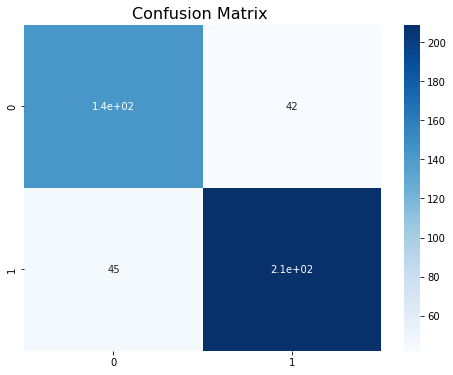

In [98]:
cm = confusion_matrix(y_test, y_predicted)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix ', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

In [94]:
print(classification_report(y_test, y_predicted))



              precision    recall  f1-score   support

       False       0.77      0.69      0.73       185
        True       0.79      0.85      0.82       254

    accuracy                           0.78       439
   macro avg       0.78      0.77      0.77       439
weighted avg       0.78      0.78      0.78       439



In [99]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

       False       0.76      0.77      0.77       185
        True       0.83      0.82      0.83       254

    accuracy                           0.80       439
   macro avg       0.80      0.80      0.80       439
weighted avg       0.80      0.80      0.80       439

